In [1]:
import pandas as pd
import re
import numpy as np

pd.set_option('display.max_columns', 30)

In [2]:
# 1 Examining data for potential issues 
# Understanding 
df=pd.read_csv("GSAF5.csv", encoding = "ISO-8859-1")
display(df.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [3]:
# 1 Examining data for potential issues 
print(df.shape)
#How many rows and columns are in the database?

(5992, 24)


In [4]:
# 1 Examining data for potential issues 
# How the computer transcribes names of columns?
print(df.columns)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [5]:
# 1 Examining data for potential issues 
# Understand how data is it interpreted as types
df.dtypes

Case Number               object
Date                      object
Year                       int64
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
Unnamed: 22               object
Unnamed: 23               object
dtype: object

In [6]:
#2 Delete unnecesary information
# How many null columns are there?

null_cols = df.isnull().sum()
null_cols

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

In [7]:
#2 Delete unnecesary information
# Delete unnamed columns 22,23 because they do not add any information, probably a mistake 

df1 = df.drop(["Unnamed: 22", "Unnamed: 23"], axis=1) 
display(df1.head())

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,NaN,Struck by fin on chest & leg,N,NaN,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,NaN,No injury: Knocked off board by shark,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [8]:

# Insert hypothesis

#2 Delete unnecesary information
# Delete columns:

# Age, Time and Species due to the amount of missing information about each indicator
# Case Number, Case Number.1, Case Number.2, Date, Name, Sex, Fatal (Y/N), Injury, Investigator or Source not relevant for analysis
# pdf, href formula, href, original order not relevant for analysis

'''
Reminder : Name of columns
'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order',
'''    
    
df2 = df1.drop(['Case Number', 'Date','Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order'], axis=1) 
display(df2.head())

,Year,Type,Country,Area,Location,Activity
0,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
1,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
2,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
3,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing
4,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing


In [9]:
#2 Analysis nature of selected columns
# Understand Type column

# Count number of invalid fields from Type of attack 

invalid = df2[(df2['Type']=='Invalid')]
print('Number of invalids:', len(invalid))



Number of invalids: 519


In [10]:
#3 Delete unnecesary information
# Display invalid rows

invalid.sort_values(['Country'])




,Year,Type,Country,Area,Location,Activity
1455,2004,Invalid,TONGA,Nuku'alofa,30 nautical miles offshore,Five men on makeshift raft after their 10 m fi...
607,2011,Invalid,ANTIGUA,St John's,Fort James Beach,Swimming
3493,1963,Invalid,ATLANTIC OCEAN,Between Southampton & Canary Islands,NaN,"Greek steamship Lakonia caught fire, 98 of her..."
5747,1852,Invalid,ATLANTIC OCEAN,NaN,NaN,NaN
4680,1935,Invalid,AUSTRALIA,New South Wales,Coogee,"Disappeared 11 days earlier, probable homicide..."
...,...,...,...,...,...,...
303,2014,Invalid,NaN,NaN,NaN,Sea disaster
3162,1970,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina
3435,1964,Invalid,NaN,NaN,NaN,Spearfishing
5189,1909,Invalid,NaN,NaN,Near the equator,Jumped overboard


In [11]:
#3 Analysis nature of selected columns
# Column Type

# Remove invalid fields from Type column
# All the fields have relevant data apart from invalid ones

invalid_rows=df2[df2["Type"]== 'Invalid']
invalid_rows.index
invalid_rows

df3=df2.drop(invalid_rows.index)


In [12]:
#3 Analysis nature of selected columns
# Column Type
# How many fields are there for boat, boating and sea disaster? 

Boat_rows = df3[(df3['Type']=='Boat')]
print('Number of Boats:', len(Boat_rows))

Boating_rows = df3[(df3['Type']=='Boating')]
print('Number of Boating:', len(Boating_rows))

SeaDisaster_rows = df3[(df3['Type']=='Sea Disaster')]
print('Number of Sea Disaster:', len(Boating_rows))


Number of Boats: 200
Number of Boating: 110
Number of Sea Disaster: 110


In [13]:

df3['Type'].value_counts()

Unprovoked      4386
Provoked         557
Sea Disaster     220
Boat             200
Boating          110
Name: Type, dtype: int64

In [14]:
#3 Analysis nature of selected columns
# Column Type
#Change Boating for Boat 

def Clean_names(TypeName):
    if re.search('ing', TypeName):
        pos= re.search('ing', TypeName).start()
        return TypeName[:pos]
    else:
        return TypeName

df3['Type']=df3["Type"].apply(Clean_names)
print(df3)
display(df3)

#Duda why I cannot rename df3 in df4?

      Year        Type             Country               Area  \
0     2016  Unprovoked                 USA            Florida   
1     2016  Unprovoked                 USA            Florida   
2     2016  Unprovoked                 USA            Florida   
3     2016  Unprovoked           AUSTRALIA           Victoria   
4     2016  Unprovoked           AUSTRALIA           Victoria   
...    ...         ...                 ...                ...   
5987     0  Unprovoked           AUSTRALIA  Western Australia   
5988     0  Unprovoked           AUSTRALIA  Western Australia   
5989     0  Unprovoked                 USA     North Carolina   
5990     0  Unprovoked              PANAMA                NaN   
5991     0  Unprovoked  CEYLON (SRI LANKA)   Eastern Province   

                                 Location      Activity  
0        New Smyrna Beach, Volusia County       Surfing  
1        New Smyrna Beach, Volusia County       Surfing  
2        New Smyrna Beach, Volusia County    

,Year,Type,Country,Area,Location,Activity
0,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
1,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
2,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing
3,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing
4,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing
...,...,...,...,...,...,...
5987,0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving
5988,0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving
5989,0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming
5990,0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN


In [15]:
#3 Analysis nature of selected columns
# Column Type
# check if Boating was replaced by Boat
check = df3[df3['Type']== 'Boating'] 
  
print(check) 

# Dudas is this working?

Empty DataFrame
Columns: [Year, Type, Country, Area, Location, Activity]
Index: []


In [16]:
#3 Analysis nature of selected columns
# Column Year

print('\n.Unique values in column Year:', df3.Year.unique())


.Unique values in column Year: [2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003
 2002 2001 2000 1999 1998 1997 1996 1995 1984 1994 1993 1992 1991 1990
 1989 1988 1987 1986 1985 1983 1982 1981 1980 1979 1978 1977 1976 1975
 1974 1973 1972 1971 1970 1969 1968 1967 1966 1965 1964 1963 1962 1961
 1960 1959 1958 1957 1956 1955 1954 1953 1952 1951 1950 1949 1948 1848
 1947 1946 1945 1944 1943 1942 1941 1940 1939 1938 1937 1936 1935 1934
 1933 1932 1931 1930 1929 1928 1927 1926 1925 1924 1923 1922 1921 1920
 1919 1918 1917 1916 1915 1914 1913 1912 1911 1910 1909 1908 1907 1906
 1905 1904 1903 1902 1901 1900 1899 1898 1897 1896 1895 1894 1893 1892
 1891 1890 1889 1888 1887 1886 1885 1884 1883 1882 1881 1880 1879 1878
 1877 1876 1875 1874 1873 1872 1871 1870 1869 1868 1867 1865 1864 1863
 1862 1861 1860 1859 1858 1856 1855 1854 1853 1852 1851 1850 1849 1847
 1846 1845 1844 1842 1841 1840 1839 1837 1836 1835 1834 1832 1830 1829
 1828 1827 1826 1825 1822 1817 1816 1812 1811

In [17]:
#3 Analysis nature of selected columns
# Column Year


df4=df3['Year'].dropna()
df4 = df3[df3['Year']>=1950].sort_values(by=['Year'])
#df.sort_values(by=['col1']

df4


,Year,Type,Country,Area,Location,Activity
4270,1950,Unprovoked,FIJI,NaN,Near Lautoka,NaN
4244,1950,Unprovoked,USA,Florida,"Rock Harbor, Key Largo, Monroe County","Goggle-diving for seaweeds, but standing in water"
4242,1950,Unprovoked,USA,Texas,Near Port Arthur,Swimming
4241,1950,Unprovoked,CUBA,Caribbean Sea,NaN,Swept off deck of S.S.Frontenac enroute from W...
4240,1950,Provoked,ITALY,Savona,Albenga,Fishing
...,...,...,...,...,...,...
69,2016,Unprovoked,AUSTRALIA,New South Wales,"First Sun Beach, Byron Bay",Swimming
70,2016,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing
71,2016,Unprovoked,USA,Florida,"Off Singer Island, Palm Beach County",Spearfishing
74,2016,Unprovoked,USA,Florida,"Florida Keys, Monroe County",Fishing


In [18]:
#3 Analysis nature of selected columns
# Column Country

# Delete rows without information 

df4=df3.dropna(subset=['Country'])
df4

(df4.shape)

# Check if cleaning occurred 
df4['Country'].isnull().sum()

0

In [19]:
#3 Analysis nature of selected columns
# Column Country

# Check how many unique values are in column country 

print('\n.Unique values in column Country:', df4.Country.unique())

c=df4.Country.unique()

print('\n.Type of data:', type(c))



 


.Unique values in column Country: ['USA' 'AUSTRALIA' 'NEW CALEDONIA' 'REUNION' 'BAHAMAS' 'SPAIN' 'CHINA'
 'JAPAN' 'COLUMBIA' 'SOUTH AFRICA' 'EGYPT' 'NEW ZEALAND' 'INDONESIA'
 'FRENCH POLYNESIA' 'Fiji' 'BRAZIL' 'DOMINICAN REPUBLIC'
 'UNITED ARAB EMIRATES' 'ARUBA' 'MOZAMBIQUE' 'THAILAND' 'FIJI'
 'PUERTO RICO' 'MEXICO' 'ATLANTIC OCEAN' 'GREECE' 'MAURITIUS' 'ST. MARTIN'
 'FRANCE' 'ECUADOR' 'PAPUA NEW GUINEA' 'TRINIDAD & TOBAGO' 'KIRIBATI'
 'ISRAEL' 'DIEGO GARCIA' 'TAIWAN' 'PALESTINIAN TERRITORIES' 'GUAM'
 'SEYCHELLES' 'BELIZE' 'JAMAICA' 'PHILIPPINES' 'NIGERIA' 'TONGA'
 'SCOTLAND' 'ITALY' 'CHILE' 'KENYA' 'RUSSIA' 'TURKS & CAICOS' 'COSTA RICA'
 'UNITED KINGDOM' 'MALAYSIA' 'SAMOA' 'AZORES' 'SOLOMON ISLANDS'
 'SOUTH KOREA' 'MALTA' 'VIETNAM' 'MADAGASCAR' 'UNITED ARAB EMIRATES (UAE)'
 'PANAMA' 'SOMALIA' 'CUBA' 'CROATIA' 'ENGLAND' 'NORWAY' 'YEMEN'
 'GULF OF ADEN' 'Sierra Leone' 'ST. MAARTIN' 'GRAND CAYMAN' 'VANUATU'
 'MEXICO ' 'VENEZUELA' ' TONGA' 'URUGUAY' 'INDIA' 'MICRONESIA'
 'CARIBBEAN SEA' 

In [20]:
a = df4['Country'].unique()
print(sorted(a))

[' PHILIPPINES', ' TONGA', 'ADMIRALTY ISLANDS', 'ALGERIA', 'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS', 'ANGOLA', 'ARGENTINA', 'ARUBA', 'ASIA?', 'ATLANTIC OCEAN', 'AUSTRALIA', 'AZORES', 'BAHAMAS', 'BAHREIN', 'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA', 'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA', 'BRITISH WEST INDIES', 'BURMA', 'Between PORTUGAL & INDIA', 'CANADA', 'CAPE VERDE', 'CARIBBEAN SEA', 'CENTRAL PACIFIC', 'CEYLON (SRI LANKA)', 'CHILE', 'CHINA', 'COLUMBIA', 'COOK ISLANDS', 'COSTA RICA', 'CRETE', 'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'Coast of AFRICA', 'DIEGO GARCIA', 'DJIBOUTI', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'EGYPT ', 'EGYPT / ISRAEL', 'EL SALVADOR', 'ENGLAND', 'EQUATORIAL GUINEA / CAMEROON', 'FALKLAND ISLANDS', 'FEDERATED STATES OF MICRONESIA', 'FIJI', 'FRANCE', 'FRENCH POLYNESIA', 'Fiji', 'GABON', 'GEORGIA', 'GHANA', 'GRAND CAYMAN', 'GREECE', 'GREENLAND', 'GRENADA', 'GUAM', 'GUINEA', 'GULF OF ADEN', 'GUYANA', 'HAITI', 'HONDURAS', 'HONG 

In [21]:
#3 Analysis nature of selected columns
# Column Country
# Filtering only rows which are not misleading ex. not showing ATLANTIC OCEAN

df5 = df4[(df4['Country'] != 'ATLANTIC OCEAN') & (df4['Country'] != 'GULF OF ADEN')]

# To test 
df5['Country'].value_counts().reset_index().sort_values(['index']).head(20)

,index,Country
157,PHILIPPINES,1
110,TONGA,2
188,ADMIRALTY ISLANDS,1
116,ALGERIA,1
93,AMERICAN SAMOA,3
174,ANDAMAN / NICOBAR ISLANDAS,1
160,ANGOLA,1
151,ARGENTINA,1
177,ARUBA,1
114,ASIA?,1


In [22]:
#4 Validating hypothesis
# Calculating countries where most incidents happen

df5["Country"].value_counts()

# Australia is not the first country, where? second hypthosis New South Wales
# US is the country, where? second hypothesis Florida
# Reminder to remove data older than 1950s prior to complete the exercise

USA                    1933
AUSTRALIA              1166
SOUTH AFRICA            503
PAPUA NEW GUINEA        131
NEW ZEALAND             113
                       ... 
EGYPT / ISRAEL            1
BAHREIN                   1
ADMIRALTY ISLANDS         1
BRITISH WEST INDIES       1
RED SEA                   1
Name: Country, Length: 191, dtype: int64

In [23]:
#4Validating hypothesis

#Calculating where in the US is most common for incidents to happen

#Cleaning area column to perform analysis on state where incidents happen the most

#Create new dataframe with only country and area

# df7 Dataframe zooming country USA and area only

df6 = df5[["Country","Area"]]

df7=df6[(df6['Country']=='USA')]

display(df7)

print('\n.Unique values in Area dataframe df7:', df7.Area.unique())

# Cleaning subdataframe Country USA and Area

df8=df7.dropna()
display(df8)

print('\n.Unique values in Area dataframe df8:', df8.Area.unique())

# Check null values from Area and Country were deleted

null_cols2 = df8.isnull().sum()
null_cols2

# Delete 'North & South Carolina'

#delete_fields=i[i["Area"]== 'North & South Carolina']
#delete_fields.index
#delete_fields

#j=i.drop(delete_fields.index)

#display(j)

#print('\n.Unique values in Area dataframe j:', j.Area.unique())

,Country,Area
0,USA,Florida
1,USA,Florida
2,USA,Florida
6,USA,Florida
7,USA,Hawaii
...,...,...
5939,USA,Florida
5973,USA,Florida
5978,USA,North Carolina
5982,USA,Hawaii



.Unique values in Area dataframe df7: ['Florida' 'Hawaii' 'South Carolina' 'California' 'Alabama'
 'Massachusetts' 'North Carolina' 'Texas' 'Maryland' 'Louisiana'
 'Delaware' 'Palmyra Atoll' 'Georgia' 'Oregon' 'New Jersey' 'Puerto Rico'
 'Maine' 'Virginia' 'New York' 'US Virgin Islands' 'Kentucky' 'Guam'
 'New Mexico' 'South Carolina ' 'Johnston Atoll' 'Alaska' 'Missouri'
 'Mississippi' 'Washington' 'Rhode Island' 'North & South Carolina'
 'Florida ' nan 'Pennsylvania' 'Connecticut' 'Wake Island'
 ' North Carolina' 'Midway Atoll' 'East coast' ' New Jersey' 'New York '
 'North Carolina ']


,Country,Area
0,USA,Florida
1,USA,Florida
2,USA,Florida
6,USA,Florida
7,USA,Hawaii
...,...,...
5939,USA,Florida
5973,USA,Florida
5978,USA,North Carolina
5982,USA,Hawaii



.Unique values in Area dataframe df8: ['Florida' 'Hawaii' 'South Carolina' 'California' 'Alabama'
 'Massachusetts' 'North Carolina' 'Texas' 'Maryland' 'Louisiana'
 'Delaware' 'Palmyra Atoll' 'Georgia' 'Oregon' 'New Jersey' 'Puerto Rico'
 'Maine' 'Virginia' 'New York' 'US Virgin Islands' 'Kentucky' 'Guam'
 'New Mexico' 'South Carolina ' 'Johnston Atoll' 'Alaska' 'Missouri'
 'Mississippi' 'Washington' 'Rhode Island' 'North & South Carolina'
 'Florida ' 'Pennsylvania' 'Connecticut' 'Wake Island' ' North Carolina'
 'Midway Atoll' 'East coast' ' New Jersey' 'New York ' 'North Carolina ']


Country    0
Area       0
dtype: int64

In [24]:
df9 = df8['Area'].value_counts().reset_index().sort_values(['index'])

# Reset Index se aplica con funciones como value_count group_by para poder acceder a los datos mediante las columnas
# Resent Index redefine la columna país que ahora tiene como título el nombre index y como filas los nombres de los estados

In [25]:
data = df8['Area'].value_counts()
type(data)

pandas.core.series.Series

In [26]:
type(df9)

pandas.core.frame.DataFrame

In [27]:
df9.head()

,index,Area
24,New Jersey,1
39,North Carolina,1
12,Alabama,13
35,Alaska,1
2,California,247


In [28]:
#df9.rename(columns={'index':'State', 'Area':'Attacks'}, inplace=True)

In [29]:
#df9=df9.rename(columns={'index':'State', 'Area':'Attacks'})
#inplace implicitamente está machacando la df9 

df10=df9.rename(columns={'index':'State', 'Area':'Attacks'})
display(df10)

,State,Attacks
24,New Jersey,1
39,North Carolina,1
12,Alabama,13
35,Alaska,1
2,California,247
20,Connecticut,5
17,Delaware,6
30,East coast,1
0,Florida,925
22,Florida,1


In [30]:
df10['State'].tolist()
# tolist transforma df10 en una serie con los valores de los estados

[' New Jersey',
 ' North Carolina',
 'Alabama',
 'Alaska',
 'California',
 'Connecticut',
 'Delaware',
 'East coast',
 'Florida',
 'Florida ',
 'Georgia',
 'Guam',
 'Hawaii',
 'Johnston Atoll',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Midway Atoll',
 'Mississippi',
 'Missouri',
 'New Jersey',
 'New Mexico',
 'New York',
 'New York ',
 'North & South Carolina',
 'North Carolina',
 'North Carolina ',
 'Oregon',
 'Palmyra Atoll',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Carolina ',
 'Texas',
 'US Virgin Islands',
 'Virginia',
 'Wake Island',
 'Washington']

In [31]:
df10['State'].str.replace('\sNorth\sCarolina', 'North Carolina').tolist()
# transformar a string df10['State'] porque no todos los objectos son strings y usar funcion replace para strings
# regex forma parte de la función replace 

[' New Jersey',
 'North Carolina',
 'Alabama',
 'Alaska',
 'California',
 'Connecticut',
 'Delaware',
 'East coast',
 'Florida',
 'Florida ',
 'Georgia',
 'Guam',
 'Hawaii',
 'Johnston Atoll',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Midway Atoll',
 'Mississippi',
 'Missouri',
 'New Jersey',
 'New Mexico',
 'New York',
 'New York ',
 'North & South Carolina',
 'North Carolina',
 'North Carolina ',
 'Oregon',
 'Palmyra Atoll',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Carolina ',
 'Texas',
 'US Virgin Islands',
 'Virginia',
 'Wake Island',
 'Washington']

In [32]:

# Limpiar columna estados

df10['State'] = df10['State'].str.replace(' North Carolina', 'North Carolina')
df10['State'] = df10['State'].str.replace('North & South Carolina', 'North Carolina')
df10['State'] = df10['State'].str.replace('North Carolina ', 'North Carolina')
df10['State'] = df10['State'].str.replace('South Carolina ', 'South Carolina')
df10['State'] = df10['State'].str.replace('New York ', 'New York')
df10['State'] = df10['State'].str.replace(' New Jersey', 'New Jersey')
df10['State'] = df10['State'].str.replace('Florida ','Florida')
display (df10)

,State,Attacks
24,New Jersey,1
39,North Carolina,1
12,Alabama,13
35,Alaska,1
2,California,247
20,Connecticut,5
17,Delaware,6
30,East coast,1
0,Florida,925
22,Florida,1


In [33]:
df10['State'].tolist()


['New Jersey',
 'North Carolina',
 'Alabama',
 'Alaska',
 'California',
 'Connecticut',
 'Delaware',
 'East coast',
 'Florida',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Johnston Atoll',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Midway Atoll',
 'Mississippi',
 'Missouri',
 'New Jersey',
 'New Mexico',
 'New York',
 'New York',
 'North Carolina',
 'North Carolina',
 'North Carolina',
 'Oregon',
 'Palmyra Atoll',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Carolina',
 'Texas',
 'US Virgin Islands',
 'Virginia',
 'Wake Island',
 'Washington']

In [34]:
df11 = df10.groupby(['State'])['Attacks'].sum().reset_index()

# sumar los ataques agrupando los estados para que no haya dos north carolinas sino una 

In [35]:
df11

,State,Attacks
0,Alabama,13
1,Alaska,1
2,California,247
3,Connecticut,5
4,Delaware,6
5,East coast,1
6,Florida,926
7,Georgia,13
8,Guam,1
9,Hawaii,248


In [48]:
import geopandas as gpd

In [52]:
usa = gpd.read_file('states.shx')

In [53]:
usa.shape

(51, 6)

In [55]:
usa.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [57]:
df11.rename(columns={'State':'STATE_NAME'}, inplace=True)

#virtual environment para tener distintas versiones de diferentes paquetes
#preparar el df11 para hacer el merge llamando state state_name
df11.columns

Index(['STATE_NAME', 'Attacks'], dtype='object')

In [80]:
map = usa.merge(df11, on='STATE_NAME', how='left')

# left se queda con los 51 estados de la variable usa que es un dataframe pero elimina las islas que estaban en el df11 como guam porque no las incluye como estados

In [81]:
map.shape

(51, 7)

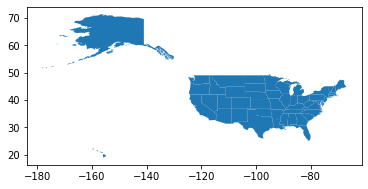

In [82]:
map.plot()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


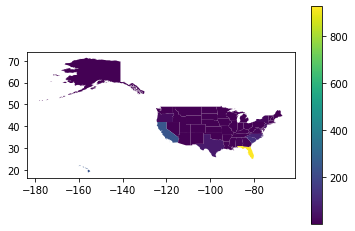

In [85]:
map.plot(column='Attacks', legend=True)

In [87]:
usa.to_csv('usa.csv')
df11.to_csv('df11.csv')